<h1><center> Programming in Mathematica and Python </center></h1>

<h1><center> <span style='color:red'>Lab 5: Introduction to Stochastic Simulation </span></center></h1>

As for the previous lab: try to understand the code and anticipate the output before you run the cell. Did it confirm your guess? Great! If not, try to understand why, and, if needed, ask questions to your colleagues, or during the lab session.

Do not hesitate to send us an email if there is something you do not understand, or have any questions.

Reminder for Jupyter notebook: Check [here](https://www.markdownguide.org/basic-syntax/) for more details on the Markdown syntax. You can change the cell type by selecting Cell > Cell Type.

<h2><center>  <span style='color:red'>I - Random number Generators </span> </center></h2>

As Numpy is the module that you will use the most for computational physics problems, in this Lab we will focus on the random number generators available in Numpy, in its <code>random</code> module.

In [ ]:
import numpy as np



<h3>Random number generators</h3>

Random number generation is a process that generates a sequence of numbers that cannot be reasonably predicted better than by random chance.

In computing, there are two main ways to generate random numbers: 

 - Hardware random number generators, or **true random number generators**, are devices that generate random numbers from measurements of a physical process expected to be random. Such devices are often based on phenomena that generate statistically random "noise" signals, such as thermal noise, atmospheric noise, or other external electromagnetic and quantum phenomena.
 
 
 - **Pseudorandom number generators** are based on algorithms that can generate long sequences of numbers that are random in appearance, but that are completely determined by the initial value, known as the **seed** value or key. As a result, the entire seemingly random sequence can be reproduced if the seed value is known.  Besides, this sequence has a finite length (called period of the generator), which can be an issue in your simulations if you need to generate more numbers than the length of this sequence. In this case, the generator will loop back at the beginning of the sequence and re-generate the exact same sequence again, which as a result can bias statistics in your simulation. Therefore, depending on the process that you want to simulate, you may have to check which generator to use, and what is its period. Note: this will rarely be an issue with the generators available in Numpy.


<h2><span style='color:red'>I.1. Example: sampling random number uniformly distributed on $[0,1]$</span></h2>

**<span style='color:red'>Ex 1.</span> Sampling uniformly a random number in $[0,1)$ using <code>np.random.random()</code>:** re-run the cell multiple times to observe that the returned number is different at each run.

In [ ]:
np.random.random()

Note: Using the same function, you can also create a numpy array with random elements uniformly sampled over $[0,1)$. Re-run the cell multiple times and observe that the returned numbers are different at each run.

In [ ]:
np.random.random((3,2))

<h2><span style='color:red'>I.2. Setting the seed</span></h2>

**Setting the seed of the generator using <code>np.random.seed()</code>**: this is useful when one wants to have a reproducible code.

**<span style='color:red'>Ex 2.</span>** Re-run the following cell multiple times and observe that the returned values are always the same.

In [ ]:
np.random.seed(12)
np.random.random((3,2))

**<span style='color:red'>Q1.</span> Using methods of <code>numpy.random</code>, can you sample: a) 10 random numbers from a standard normal distribution? b) 10 integers between 0 (included) and 20 (excluded)? c) a real number uniformly sampled between 2.5 and 5?**<br>

Tips: Remember to use the <code>tab</code> key to see the methods available, and to use the <code>?</code> to access the documentation of a method.

You can also check the <code>numpy.random</code> documentation [here](https://numpy.org/doc/stable/reference/random/legacy.html).

In [ ]:
# a)


In [ ]:
# b)


In [ ]:
# c)


<h2><span style='color:red'>I.3. The "Generator" object</span></h2>

In the example using the function <code>np.random.random()</code> we haven't specified which generator to use. In fact the function <code>random()</code> uses by default a Mersenne Twister generator (one of the most tested random number generators), which has a period of $2^{19937}-1$. 

Since recently, it is recommanded to use a new syntax for sampling random numbers with Numpy, in which one can specify which random number generator they want to use. In this case, the default bit generator is PCG64. 

**<span style='color:red'>Ex 3.</span>** Here is an example:

In [ ]:
### Without specifying the seed:
rng=np.random.default_rng()
print(rng)
rng.random((3,3))

In [ ]:
### With the seed:
rng=np.random.default_rng(seed=42)
rng.random((3,3))

To choose the generator that you want to use, you must define a <code>Generator</code> object. Check the examples below:

In [ ]:
from numpy.random import Generator, PCG64

### Using PCG64 (this gives the same generator than the default one):
rng=np.random.Generator(PCG64()) ## equivalent to "np.random.default_rng()"
print(rng)
print(rng.random())

In [ ]:
### Using Mersenne-Twister generator, MT19937:
from numpy.random import Generator, MT19937

rng=np.random.Generator(MT19937())
print(rng)
print(rng.random())

**<span style='color:red'>Q2.</span> Using the random generator of your choice, can you define a generator object <code>rng</code>, and then use methods of <code>rng</code> to: a) sample 10 integers between 0 (included) and 20 (excluded); b) randomly sample 5 random number out of a list of your choice.**

Tips: Remember to use the <code>tab</code> key to see the methods available, and to use the <code>?</code> to access the documentation of a method.

In [ ]:
# Taking the generator of your choice:

In [ ]:
# Answer for a):

In [ ]:
# Answer for b):



<h2><span style='color:red'> I.4. Simple test of a generator</span></h2>

**<span style='color:red'>Q3.</span> Histogram: Using the method <code>random()</code> with one of the two random generators introduced above, generate a dataset of $10^5$ points uniformly sampled between $[0, 1]$. Plot a normalized histogram (probability density function) of the generated values. Check that the sampled values are uniformly distributed between $0$ and $1$.**

Tips: To plot the histogram, use the function <code>hist()</code> of pyplot. Remember that you can use the <code>?</code> to access the documentation of a function. Use <code>axhline()</code> to plot an horizontal line at 1.

In [ ]:
from matplotlib import pyplot as plt

In [ ]:
# Answer to Q3:


In [ ]:
# Plot:


**<span style='color:red'>Q4.</span> Temporal correlations: Can you show that there is no correlations between the values sampled consecutively by plotting a scatter plot of pair values $x=data[n]$ and $y=data[n+1]$, where $data$ contains the first $10^4$ datapoints of the previous dataset?**

In [ ]:
# Answer to Q2:


<h2><center>  <span style='color:red'> II- Sampling random variables</span> </center></h2>

In many of the following cases, one will just have to make use of the uniform generator over $[0,1)$.

<h2><span style='color:red'>II.1. Sampling Discrete Random variables</span></h2>

<h3>a. Binary variables:</h3>

To sample a random value of a binary variable taking a value $v_1$ with probability $p$ and a value $v_2$ otherwise, do the following:

 - Sample uniformly a random number $\epsilon$ in the interval $[0,1)$;<br>
 
 
 - If $\epsilon < p$ then return $v_1$;<br> 
 else return $v_2$
 
**<span style='color:red'>Q5.</span> Can you write a function <code>coin(p)</code> that simulates an unfair coin, which returns $1$ (for "Heads") with probability $p$, and $0$ (for "Tails") with probability $(1-p)$? See the figure on the left below for an illustration of the problem.**

In [ ]:
# Answer to Q5: 


In [ ]:
# Test:


**<span style='color:red'>Q6.</span> Using a mask, can you write a function <code>coin_trials(p, N_trials)</code> that returns a <code>data</code> array of $0$'s and $1$'s with the results of <code>N_trials</code> toss of the unfair coin described in Q5?**

**Test your function by checking that, for very large values of <code>N_trials</code>, the fraction of $1$'s in the returned <code>data</code> array converges to <code>p</code> (the fraction of $1$'s is equal to the number of $1$'s in <code>data</code> divided by the number of elements in <code>data</code>). For instance, test <code>N_trials=100, 10^3, 10^4, 10^5, 10^6</code>.**


In [ ]:
# Answer to Q6:


In [ ]:
# Q6 - Test:


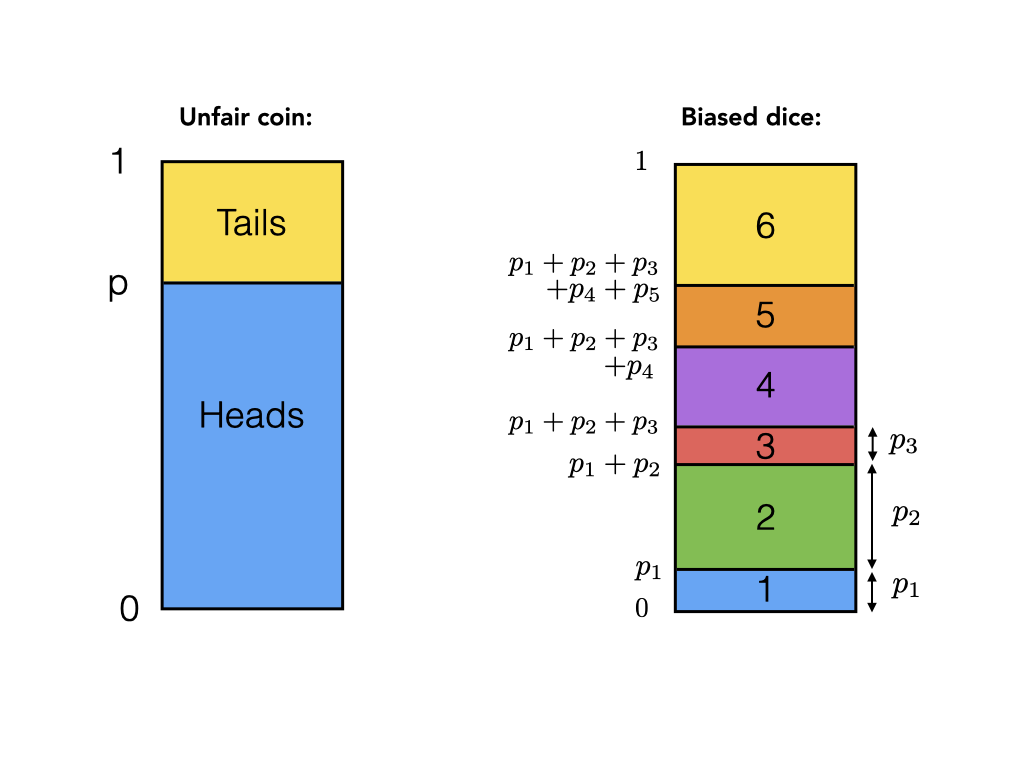

In [17]:
from IPython.display import Image
Image('Coin_Dice.png')

<h3>b. Discrete variables:</h3>

To sample a random value of a discrete variable that can take $n$ values $(v_1, \cdots, v_n)$ with respective probability $p_1,\cdots,p_n$, we follow a similar procedure than for the binary case (see figure above):

 - sample uniformly a random number $\epsilon$ in the interval $[0,1)$;
 
 
 - if $\sum_{i=1}^{k-1}p_i < \epsilon < \sum_{i=1}^{k}p_i$, then return $v_k$.<br><br>
 
 
 
 
**<span style='color:blue'>Q7.</span> Can you write a function <code>dice(delta)</code> that simulates a biased dice, which returns "1", "2, "3", "4", or "5", each with probability $p=(1-\delta)/6$, and returns "6" with a larger probability, $p=(1+5\delta)/6$ ? where $\delta$ is a number between $0$ and $1$.**

**See figure on the right above titled "biased dice" for an illustration of a similar problem with a biased dice.**

In [ ]:
# Answer to Q7:

**<span style='color:blue'>Q8.</span> Using multiple masks, can you write a function <code>dice_trials(p, N_trials)</code> that returns a <code>data</code> array of integer values between $1$ and $6$ with the results of <code>N_trials</code> rolls of the biased dice described in Q5?**

**Test your function by checking that, for very large values of <code>N_trials</code>, the fraction of $6$'s in the returned <code>data</code> array converges to <code>(1+5*delta)/6</code> (the fraction of $6$'s is equal to the total number of $6$'s in <code>data</code> divided by the number of elements in <code>data</code>). For instance, test <code>N_trials=100, 10^3, 10^4, 10^5, 10^6</code>.**

In [ ]:
# Answer to Q8:

In [ ]:
# Test Q8:

<h2><span style='color:red'>II.2. Sampling continuous variables</span></h2>

<h3>a. Using the inverse of the cumulative function </h3>

<h3>b. Example of the exponential distribution</h3>

Consider a series of independent events that happen with a constant rate $\lambda$. At any give time $t_0$, the probability that the next event happens at a time $t_0+t$ is independent of $t_0$ and of previous events and is given by the exponential distribution:

\begin{align}
    P(t) = \lambda\,\exp\,(-\lambda\,t)
\end{align}

For example, following the trajectory of laser in a diffusive medium, scattering events occur with an exponential probability distribution. A similar example, following the trajectory of a neutron in a nuclear reactor, collisions with atomic nuclei of the medium happen at exponentially distributed times (at each collision, an event happen, which could be a scattering event, a fission of a nucleus, or an absorption of the neutron by a nucleus). 

**<span style='color:blue'>Q9 (optional).</span> With the help of the lecture's slide, show that one can sample a random time $t$ that is exponentially distributed by sampling a random variable $\eta$ uniformly distributed over $[0,1)$ and returning $t=-\frac{1}{\lambda}\log(\eta)$.**

Your explanations here:

**<span style='color:red'>Q10.</span> Can you write a function <code>exp_samples(lambdaa, Nsamples)</code> that takes as argument a rate <code>lambdaa</code> and a number of samples <code>Nsamples</code>, and that returns an array of <code>Nsamples</code> values that are exponentially distributed with rate <code>lambdaa</code>?**

**Test your function by sampling $10^5$ random values with rate $\lambda=0.5$, and by plotting the normalised histogram (density function) of the sampled values. Compare with the known probability density function: $P(t)=\lambda\,\exp(-\lambda\,t)$.**

In [ ]:
# Answer to Q10:


In [ ]:
# Plot for Q10:


<h2><span style='color:red'>II.3. Sampling random numbers with Numpy</span></h2>

Almost all the common distributions are already implemented in Numpy. You can find a list of available functions [here](https://numpy.org/doc/stable/reference/random/generator.html).

For instance the exponential distribution is implemented as <code>random.random.exponential(tau, Nsample)</code>, where $\tau$ is the scale parameter, which is the inverse of the rate parameter $\lambda$ we used above.

You can also use <code>rng.exponential(tau, Nsample)</code> where <code>rng</code> is a chosen generator (for instance the default generator: <code>rng=np.random.default_rng()</code>).

**<span style='color:red'>Q11.</span> Using this numpy function, can you sample again $10^5$ values and plot their distribution against the curve of the exponential density function for $\lambda=0.5$?**

In [ ]:
# Plot for Q11: ## Identical code to Q10, just generated data using the NumPy function instead:


**<span style='color:blue'>Q12.</span> Using Numpy functions, can you sample the following random variables and return the correct arrays?**

In [ ]:
# Create a 3x3 array of random integers in the interval [0, 10)
# using 'np.random.randint()'
# or Using 'rng.integers()'

In [ ]:
# 50 real values uniformly distributed between 3 and 10:

In [ ]:
# Create a 3x3 array with values randomly sampled from the array a below:

In [ ]:
# Create a 3x3 array of normally distributed random values
# with mean 0 and standard deviation 1

<h2><center>  <span style='color:red'> III - Introduction to Monte Carlo simulations </span> </center></h2>

<h3>Example: calculating the area of a circle</h3>

From the book: "Algorithms and Computations" by Werner Krauth.

Direct sampling is exemplified by an amusing game that we can imagine children playing on the beaches of Monaco. In the sand, they first draw a large circle and a square exactly containing it (see Figure below). They then randomly throw pebbles. Each pebble falling inside the square constitutes a trial, and pebbles inside the circle are also counted as “hits”.

By keeping track of the numbers of trials and hits, the children perform a direct-sampling Monte Carlo calculation: the ratio of hits to trials is close to the ratio of the areas of the circle and the square, namely  $\pi/4$. The other day, in a game of 4000 trials, they threw 3156 pebbles inside the circle. This means that they got 3156 hits, and obtained the approximation  $\pi\simeq 3.156$ by just shifting the decimal point.

The children’s value for $\pi$ is very approximate, but improves and finally becomes exact in the limit of an infinite number of trials.

This Monte Carlo method is a powerful approach for the calculation of integrals (in mathematics, physics, and other fields).

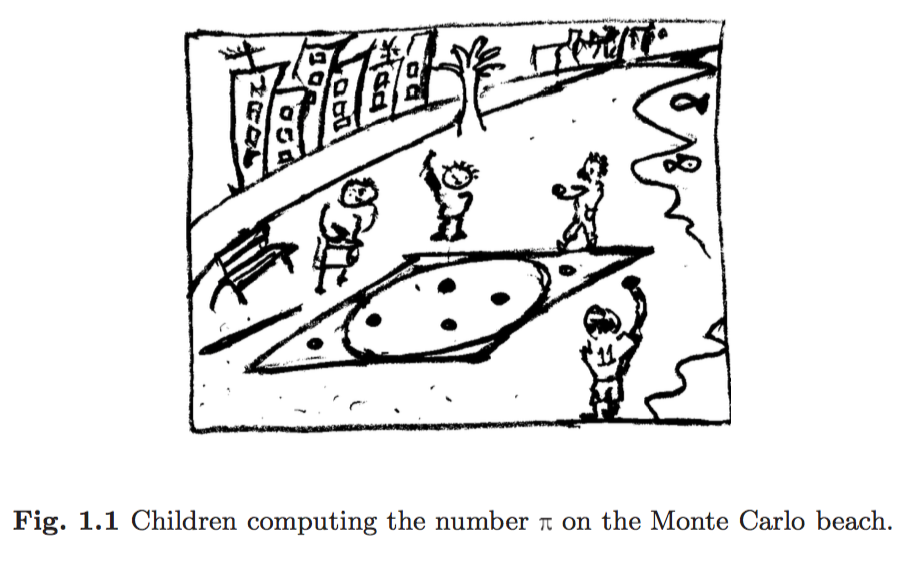

In [216]:
from IPython.display import Image
Image('Children_game.png')

**<span style='color:blue'>Q13.</span> Can you write a code that performs the children's game and return an estimated value of $\pi$ after performing $4000$ trials? Assume a square defined by $-1\leq x\leq 1$ and $-1\leq y\leq 1$, and a circle centered in $(0,0)$ with radius $1$.**

**Can you write in a table the 10 results that you get for the number of hits and for $\pi$ after playing the game 10 times (each game with $4000$ trials).**

In [ ]:
# Answer to Q13

**Tips:** You can use Pandas's DataFrame to display your results. See the following example:

In [ ]:
import pandas as pd

l=[]
for i in range(5):
    l.append(['a'+str(i), 'b'+str(i)])
    
pd.DataFrame(l,columns=['a','b'])

**<span style='color:blue'>Q14.</span> Can you play the children's game for increasing number of trials and plot a curve of the evolution of the estimate of $\pi$ as the number of trial increases? Compare your results to the actual value of $\pi$.**

In [ ]:
# Answer to Q14


<h1><center> <span style='color:red'>Homework assignment</span> </center></h1>


The following exercises must be done using NumPy: when possible, use operations on numpy arrays instead of python loops.

## H1.  Questions above:

For the homework, please answer <span style='color:blue'>**questions Q7-8**</span>, and <span style='color:blue'>**questions Q13-14**</span> highlighted in blue above.

Note that <span style='color:blue'>**Q9 is optional**</span>: you can fill in your answer in the notebook if you would like some feedback on your answer.


## H2. Brownian motion in continuous space

We would like to study the movement of a particle diffusing in the 2D-plane:

 - Between two successive collisions with molecules of the environment, the particle travels in straight lines. As molecules of the environment are uniformly distributed, the distance travelled between two collisions is exponentially distributed, with a mean travelled length of $\ell=2$ (i.e. a collision rate of $\lambda=1/\ell$).
 - At each collision, the direction of travel of the particle changes and is uniformly resampled between $0$ and $2\pi$.

**1. Can you plot the trajectory of the particle over <code>Nstep=50000</code> steps? start the particule from the position $(x,y)=(0,0)$.**

**Help:** First create an <code>ell</code> array of <code>Nstep</code> jump lengths and an array <code>theta</code> of <code>Nstep</code> angle directions. Then combines these two arrays to create two arrays of small steps <code>dx</code> and <code>dy</code> along the x-axis and the y-axis. Finally, compute the successive positions of the trajectory along the $x$ and the $y$ axes (for instance, using the method <code>.cumsum()</code> of numpy arrays).

In [ ]:
# Answer to Q1:

**2. Write a function <code>Brownian_x(ell, Nstep)</code> that takes as an input the parameter $\ell$ of the walk (the mean travelled length between two collisions) and a given number of step <code>Nstep</code>, and that returns the final position of the walker after <code>Nstep</code> steps along the $x$-axis only.**

In [ ]:
# Answer to Q2:

**3. Using the function <code>Brownian_x(ell, Nstep)</code>, sample $5.10^4$ trajectories of $N_{step}=20$ with $\ell=2$ and plot the distribution of the final position of the walker along the $x$-axis. Which type of distribution can we expect? Can you plot this distribution on top of your distribution?**

In [ ]:
# Answer to Q3:

<h2>H3. Coin flip</h2>

In Exo2 of Lab2, we created a function that can compute values from the binomial law:<br><br>
$$P(k)={n \choose k} p^k(1-p)^{n-k}$$

Consider a biased (unfair) coin that lands heads-up with probability $p$ and tails-up with probability $(1-p)$ when flipped. We recall that if an event happens on average with probability $p$, then the probability that this event occurs $k$ times in $n$ trials is given by the binomial law $P(k)$.

 1. With the help from Exo2 of Lab2, write a function that takes as argument a probability $p$ of success, a number $n$ of trials and a number $k$ of success of an event, and that returns the probability $P(k)$ that this occurs.
 Test your function on special cases. For instance, what are the values taken by $P(k)$ if $p=1$? if $p=0$?
 
 
  
 2. The experiment: Write a function that takes as argument the probability $p$ that the coin returns "Heads" and a number $N_{trials}$, that performs $N_{trials}$ trials of a coin toss and returns the number of times the coin was "Heads".<br><br>
 
 3. Write a function that performs $10 000$ times the above experiment for $N_{trials} = 1000$ and $p=0.3$, and return an array of the number of times the coin was "Heads" in each experiment.<br><br>
 
 4. Plot the density function of the number of times the coin was fair in each experiment, and compare it to the binomial distribution from question 1.

In [ ]:
# Answer to Q1:

In [ ]:
# Answer to Q2:

In [ ]:
# Q2 Test: As the number N of trials increases, we expect that "(number of faces)/N" converges to p

In [ ]:
# Answer to Q3:

In [ ]:
# Answer to Q4:

<h1><center> <span style='color:blue'>Optional Exercises:</span></center></h1>

<h2>H4 <span style='color:blue'>(optional)</span>. Random walk on a graph </h2>

See the exercise H1 in the notebook on Matplotlib.